regression

In [1]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Set the parameters for the model:
params = {
    'objective': 'reg:squarederror',
    # the objective function to optimize,
    'eval_metric': 'rmse',
    # the evaluation metric to use, 
    'max_depth': 3,
    # the maximum depth of the decision trees
    'subsample': 0.5,
    # Subsample ratio of the training instances; prevent overfitting.
    'eta': 0.1
    # learning rate (step weight)
}

/home/yishai/Data/anaconda3/envs/tf_39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [39]:
# Create some example data - random data for the inputs and outputs
N=100
X = np.random.rand(N, 5)
y = np.random.rand(N)


In [40]:
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.85)

# Fit the model
# num_boost_round parameter controls the number of boosting rounds to perform.
xg_reg = xgb.train(params, xgb.DMatrix(x_train, label=y_train), num_boost_round=100)

In [41]:
y_val_pred = xg_reg.predict(xgb.DMatrix(x_val, label=y_val))
print(y_val)
print (y_val_pred)
# print accuracy score


mse = mean_squared_error(y_val_pred, y_val)
print (mse)


[0.18361392 0.63283575 0.05486231 0.80371151 0.63106665 0.03627778
 0.72004909 0.07642556 0.94889637 0.88718621 0.9683425  0.35387592
 0.90973005 0.98934819 0.5049131 ]
[ 0.38639677  0.3714008   0.38339356  0.7066531   0.51028347  0.4405099
  0.7368475   0.46929583  0.37410334  0.4954321  -0.01867209  0.42942196
  0.31609666  0.42887527  0.65310866]
0.1807799566171134


classification

In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb
import numpy as np


/home/yishai/anaconda3/envs/tf_39/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:

from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True, as_frame=True)

In [3]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)
xg_classify = XGBClassifier(eval_metric='mlogloss')

# train
xg_classify.fit(X_train, y_train)

/home/yishai/anaconda3/envs/tf_39/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/yishai/anaconda3/envs/tf_39/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [4]:
y_val_pred = xg_classify.predict(X_val)
predictions = [round(value) for value in y_val_pred]
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



Accuracy: 96.30%


# XGBoost SHAP waterfall implementation,

To create an XGBoost SHAP waterfall implementation:

Train an XGBoost model on your data.

Use the "shap.Explainer" function to create a SHAP explainer object. This will allow you to compute SHAP values for your model predictions.

Use the "explainer.shap_values" method to compute the SHAP values for each prediction in your dataset.

Plot the SHAP values as a waterfall chart using a library such as Plotly or Matplotlib.

Interactively explore the waterfall chart to understand the contribution of each feature to the model's predictions.

shap_values.data == x sample



In [11]:
import shap
# Create a SHAP explainer object
explainer = shap.Explainer(xg_classify.predict_proba, X_val)
# Compute the SHAP values for each prediction
shap_values = explainer(X_val)


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


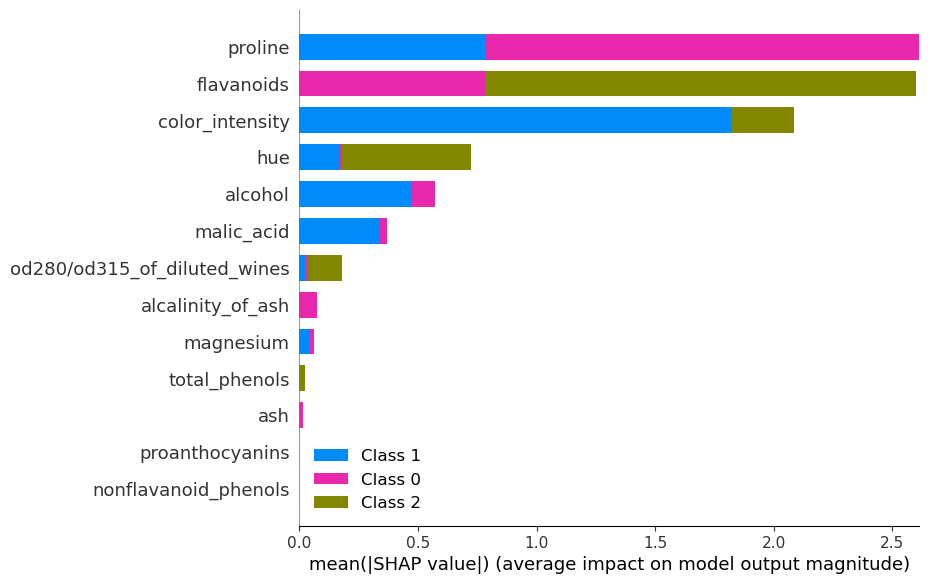

In [15]:
tree_explainer = shap.TreeExplainer(xg_classify)
shap_values_tree = tree_explainer.shap_values(X_val)
shap.summary_plot(shap_values_tree, X_val)

In [16]:
shap.waterfall_plot(tree_explainer.expected_value[0], shap_values_tree[0][0], features= X_val.iloc[0,:], feature_names= X_val.columns, show= False)

TypeError: waterfall() got an unexpected keyword argument 'features'

In [ ]:

import matplotlib.pyplot as plt


# shap.plots.waterfall(shap_values[0][0])
sample_ind = 53
shap.plots.waterfall(shap_values[sample_ind], max_display=14)
# shap.waterfall_plot(explainer.base_values[0], values[0][0], X_val[0])
shap.waterfall_plot(shap_values.base_values[sample_ind],shap_values.values[sample_ind][0],  shap_values.data[sample_ind])
# sample_ind = 53
# shap.plots.waterfall(shap_values[sample_ind], max_display=14)
# shap.waterfall_plot(explainer.base_values[0], values[0][0], X_val[0])
# # idx = 3
# np.asarray(X_val.iloc[0])
# 
# exp = shap.Explanation(shap_values.values, shap_values.base_values[0][0], shap_values.data)
# shap.plots.waterfall(exp)


# Plot Shapley values as a waterfall plot
# for i in range(len(X_val)):
#     plt.figure(figsize=(10,5))
#     shap.plots.waterfall(shap_values[i])
#     plt.title(f'Waterfall Plot for Wine Example {i}')
#     plt.xlabel('Features')
#     plt.ylabel('SHAP Value')
#     plt.show()

IndexError: list index out of range

In [ ]:
for i in range(len(X_val)):
    plt.figure(figsize=(10,5))
    shap.plots.waterfall(shap_values[i])
    plt.title(f'Waterfall Plot for Wine Example {i}')
    plt.xlabel('Features')
    plt.ylabel('SHAP Value')
    plt.show()


(124, 13, 3)

In [ ]:
X_train.shape

(124, 13)